In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [3]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [4]:
df1 = pd.read_excel('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/강서구 경진대회/data/강서구 생활인구(2020 1분기~2021 3분기 동정보포함).xlsx')
df2 = pd.read_excel('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/강서구 경진대회/data/강서구 상주인구(2020 1분기~2021 3분기 동정보 포함).xlsx')

In [5]:
df2

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권 코드,상권 코드 명,총 상주인구 수,총 가구 수,동 정보
0,2021,3,A,골목상권,1000552,가로공원로76가길,2899,1343,화곡1동
1,2021,2,A,골목상권,1000552,가로공원로76가길,2899,1343,화곡1동
2,2021,1,A,골목상권,1000552,가로공원로76가길,3121,1397,화곡1동
3,2020,4,A,골목상권,1000552,가로공원로76가길,3121,1397,화곡1동
4,2020,3,A,골목상권,1000552,가로공원로76가길,3121,1397,화곡1동
...,...,...,...,...,...,...,...,...,...
471,2021,1,R,전통시장,1001409,화곡중앙골목시장,976,433,화곡1동
472,2020,4,R,전통시장,1001409,화곡중앙골목시장,976,433,화곡1동
473,2020,3,R,전통시장,1001409,화곡중앙골목시장,976,433,화곡1동
474,2020,2,R,전통시장,1001409,화곡중앙골목시장,976,433,화곡1동


In [6]:
df20_1=df2[df2["기준_년_코드"]==2020] #2020년
df20_1=df20_1[df20_1["기준_분기_코드"]==1]
df20_1 #df20_1은 20년,1분기 것만.

df20_2=df2[df2["기준_년_코드"]==2020] #2020년
df20_2=df20_2[df20_2["기준_분기_코드"]==2]

df20_3=df2[df2["기준_년_코드"]==2020] #2020년
df20_3=df20_3[df20_3["기준_분기_코드"]==3]

df20_4=df2[df2["기준_년_코드"]==2020] #2020년
df20_4=df20_4[df20_4["기준_분기_코드"]==4]
#-----------------21년---------------------
df21_1=df2[df2["기준_년_코드"]==2021] #2021년
df21_1=df21_1[df21_1["기준_분기_코드"]==1]

df21_2=df2[df2["기준_년_코드"]==2021] #2021년
df21_2=df21_2[df21_2["기준_분기_코드"]==2]

df21_3=df2[df2["기준_년_코드"]==2021] #2021년
df21_3=df21_3[df21_3["기준_분기_코드"]==3]

In [7]:
def up(data,date):
    groups = data.groupby('동 정보')
    data2=groups.mean() #평균
    data2=data2.reset_index()
    data2=data2[['동 정보','총 상주인구 수']]
    data2.columns=['동 정보',date]
    return data2
df20_1=up(df20_1,'20년 1분기')
df20_2=up(df20_2,'20년 2분기')
df20_3=up(df20_3,'20년 3분기')
df20_4=up(df20_4,'20년 4분기')
df21_1=up(df21_1,'21년 1분기')
df21_2=up(df21_2,'21년 2분기')
df21_3=up(df21_3,'21년 3분기')

In [8]:
df_list=[df20_1,df20_2,df20_3,df20_4,df21_1,df21_2,df21_3]
df_all=pd.concat(df_list,axis=1)
subset=df20_1[['동 정보']]
df_all=df_all.drop(df_all.columns[[2,4,6]],axis=1)
#subset=df_all[['동 정보','201','202','203','204','211','212','213']]
#subset
df_all=subset.join(df_all,how='inner')
df_all.set_index('동 정보',inplace=True)
df_all=df_all.T
df_all.head()

동 정보,가양1동,공항동,등촌1동,등촌2동,등촌3동,발산1동,방화1동,방화2동,염창동,우장산동,화곡1동,화곡2동,화곡3동,화곡4동,화곡6동,화곡8동,화곡본동
20년 1분기,1428.0,2805.4,2123.75,2737.333333,88.0,2902.0,2552.4,2662.25,3628.0,2399.25,3014.3,2993.75,2484.0,2550.4,2993.666667,3526.0,3031.25
20년 2분기,1428.0,2805.4,2123.75,2737.333333,88.0,2902.0,2552.4,2662.25,3628.0,2399.25,3014.3,2993.75,2484.0,2550.4,2993.666667,3526.0,3031.25
20년 3분기,1428.0,2805.4,2123.75,2737.333333,88.0,2902.0,2552.4,2662.25,3628.0,2399.25,3014.3,2993.75,2484.0,2550.4,2993.666667,3526.0,3031.25
20년 4분기,1428.0,2805.4,2123.75,2737.333333,88.0,2902.0,2552.4,2662.25,3628.0,2399.25,3014.3,2993.75,2484.0,2550.4,2993.666667,3526.0,3031.25
21년 1분기,1428.0,2805.4,2123.75,2737.333333,88.0,2902.0,2552.4,2662.25,3628.0,2399.25,3014.3,2993.75,2484.0,2550.4,2993.666667,3526.0,3031.25


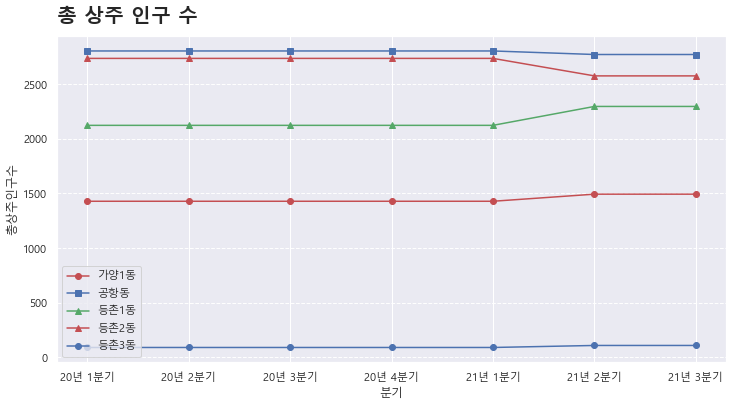

In [10]:
fig=plt.figure(figsize=(12,6))
index=df_all.index
a1,=plt.plot(index,df_all['가양1동'],'ro-')
a2,=plt.plot(index,df_all['공항동'],'bs-')
a3,=plt.plot(index,df_all['등촌1동'],'g^-')
a4,=plt.plot(index,df_all['등촌2동'],'r^-')
a5,=plt.plot(index,df_all['등촌3동'],'bo-')
plt.legend([a1,a2,a3,a4,a5],['가양1동','공항동','등촌1동','등촌2동','등촌3동'],loc=3)
plt.xlabel('분기')
plt.ylabel('총상주인구수')
plt.title("총 상주 인구 수",size=20,weight='bold',pad='13',loc='left')
plt.grid(True,axis='y',alpha=10,linestyle='--')
plt.show()